In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin

[0.9899916805729166, 0.9700752081765045, 0.9404499132283676, 0.9014122951434683, 0.853353054873273, 0.7967531846458284, 0.7321791540419026, 0.6602772405864737, 0.5817670615968223, 0.49743437202255425, 0.4081232003590738, 0.3147274013407962, 0.21818170995744407, 0.11945238632769058, 0.019527545059242202, -0.08059273411778584, -0.17990641546826108, -0.2774195359457484, -0.3721561530921775, -0.4631681125817055, -0.5495445376520764, -0.6304209454502167, -0.7049878990527672, -0.7724991085693692, -0.8322789002502718, -0.8837289788450482, -0.9263344155325731, -0.9596688014931475, -0.9833985155441722, -0.9972860631275113, -1.0011924532308918, -0.9950785894543523, -0.9790056612995023, -0.9531345317654438, -0.9177241273804932, -0.8731288467827775, -0.8197950137854587, -0.7582564104254449, -0.6891289347022597, -0.6131044364741285, -0.5309437932036023, -0.44346929485286724, -0.35155641414314126, -0.25612504454403073, -0.15813029368584763, -0.05855292433735805, 0.04161046138128964, 0.14135739631092

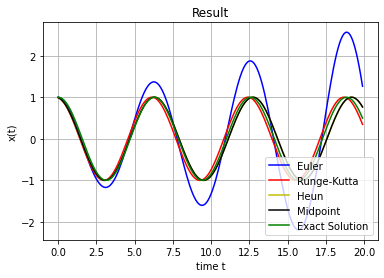

In [6]:
def f(t, x):
    return -x

def exact(x0, v0, t):
    return x0*cos(t) + v0*sin(t)

def euler_iter(x, v, t, dt):
    v_new = v + dt*f(t, x)
    x_new = x + dt*v
    return x_new, v_new

def rk4_iter(x, v, t, dt):
    k1 = f(t,x)
    k2 = f(t+dt*0.5,x+k1*0.5*dt)
    k3 = f(t+dt*0.5,x+k2*0.5*dt)
    k4 = f(t+dt,x+k3*dt)
    v += dt*(k1+2*k2+2*k3+k4)/6
    k1 = v
    k2 = v +k1*0.5*dt
    k3 = v +k2*0.5*dt
    k4 = v + k3*dt
    x += dt*(k1+2*k2+2*k3+k4)/6
    return x,v

def heun_iter(x, v, t, dt):
    k1 = f(t,x)
    k2 = f(t+dt,x+k1*dt)
    v += 0.5*dt*(k1+k2)
    k1 = k2 = v
    x += 0.5*dt*(k1+k2)
    return x,v
    
def midpoint_iter(x, v, t, dt):
    k1 = f(t,x)
    k2 = f(t+0.5*dt,x+0.5*k1*dt)
    v += k2*dt
    k1 = k2 = v
    x += k2*dt
    return x,v
    
def plot_result(x, v, tmax, n):
    dt = tmax/n
    t = 0.0
    allt = []
    r_exact = []
    r_euler = []
    r_rk4 = []
    r_heun = []
    r_midpoint = []

    x0 = x_euler = x_rk4 = x_heun = x_midpoint = x
    v0 = v_euler = v_rk4 = v_heun = v_midpoint = v

    for i in range(n):
        x = exact(x0, v0, t)
        x_euler, v_euler = euler_iter(x_euler, v_euler, t, dt)
        x_rk4, v_rk4 = rk4_iter(x_rk4, v_rk4, t, dt)
        x_heun, v_heun = heun_iter(x_heun, v_heun, t, dt)
        x_midpoint, v_midpoint = midpoint_iter(x_midpoint, v_midpoint, t, dt)
        allt.append(t)
        r_exact.append(x)
        r_euler.append(x_euler)
        r_rk4.append(x_rk4)
        r_heun.append(x_heun)
        r_midpoint.append(x_midpoint)
        t += dt
    print(r_rk4)
    
    _plot("result.png", "Result", "time t", "x(t)", allt, r_euler, r_rk4, r_heun, r_midpoint, r_exact)

def _plot(out, title, xlabel, ylabel, allt, euler, rk4, heun, midpoint, exact=None):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(allt, euler, 'b-', label="Euler")
    plt.plot(allt, rk4, 'r-', label="Runge-Kutta")
    plt.plot(allt, heun, 'y-', label="Heun")
    plt.plot(allt, midpoint, 'k-', label="Midpoint")
    if exact:
        plt.plot(allt, exact, 'g-', label='Exact Solution')

    plt.legend(loc=4)
    plt.grid(True)

    

x0 = 1
v0 = 0
tmax = 10.0
n = 100

plot_result(x0, v0, tmax*2, n*2)